In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2, TStyle, THStack
import ROOT
import numpy as np
import awkward as awk
import uproot as up
import pandas as pd
import os

Welcome to JupyROOT 6.22/06


$k_i = k_f - q$

In [2]:
MC = RDataFrame("tree_MC", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_08/Testing/file_*.root")
driver = RDataFrame("tree_driver", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_8_100_driver_old_R2_three_files.root")
# driver = RDataFrame("tree_driver", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_2_100_driver_new_R2.root")

In [3]:

tree_driver = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_8_100_driver_old_R2_three_files.root:tree_max")
# tree_driver = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_2_100_driver_new_R2.root:tree_max")
tree_MC = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_08/Testing/file_*.root:tree_maxmin")

FileNotFoundError: [Errno 2] No such file or directory: '/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_08/Testing/file_*.root'

In [4]:
MC_file_dir = "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_08/Testing/"
tree_MC_list = []
for name in os.listdir(MC_file_dir):
    tree_MC_list.append(up.open(MC_file_dir + name + ":tree_maxmin"))
tree_driver = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_8_100_driver_old_R2_three_files.root:tree_max")

In [5]:
for i in range(len(tree_MC_list)):
    tree_MC = tree_MC_list[i]
    if(i == 0):
        MC_R0_hist_max = tree_MC["R0_max"].array(library='np')[0]
        MC_R1_hist_max = tree_MC["R1_max"].array(library='np')[0]
        MC_R2_hist_max = tree_MC["R2_max"].array(library='np')[0]

        MC_R0_hist_min = tree_MC["R0_min"].array(library='np')[0]
        MC_R1_hist_min = tree_MC["R1_min"].array(library='np')[0]
        MC_R2_hist_min = tree_MC["R2_min"].array(library='np')[0]
    else:
        MC_R0_hist_max = max(MC_R0_hist_max,tree_MC["R0_max"].array(library='np')[0])
        MC_R1_hist_max = max(MC_R1_hist_max,tree_MC["R1_max"].array(library='np')[0])
        MC_R2_hist_max = max(MC_R2_hist_max,tree_MC["R2_max"].array(library='np')[0])

        MC_R0_hist_min = min(MC_R0_hist_min,tree_MC["R0_min"].array(library='np')[0])
        MC_R1_hist_min = min(MC_R1_hist_min,tree_MC["R1_min"].array(library='np')[0])
        MC_R2_hist_min = min(MC_R2_hist_min,tree_MC["R2_min"].array(library='np')[0])
driver_R0_hist_max = tree_driver["R0_hist_max"].array(library='np')[0]
driver_R1_hist_max = tree_driver["R1_hist_max"].array(library='np')[0]
driver_R2_hist_max = tree_driver["R2_hist_max"].array(library='np')[0]

driver_R0_hist_min = tree_driver["R0_hist_min"].array(library='np')[0]
driver_R1_hist_min = tree_driver["R1_hist_min"].array(library='np')[0]
driver_R2_hist_min = tree_driver["R2_hist_min"].array(library='np')[0]



In [6]:
nBins_MC = 1000
nBins_MC_R1 = 10000000
# Calculate common bin width
binWidth_R0 = MC_R0_hist_max / nBins_MC
binWidth_R1 = MC_R1_hist_max / nBins_MC_R1
binWidth_R2 = MC_R2_hist_max / nBins_MC

nBins_driver_R0 = int(driver_R0_hist_max // binWidth_R0)
nBins_driver_R1 = int(driver_R1_hist_max // binWidth_R1)
nBins_driver_R2 = int(driver_R2_hist_max // binWidth_R2)

In [7]:
MC_R1_hist_min

-182019.23195209034

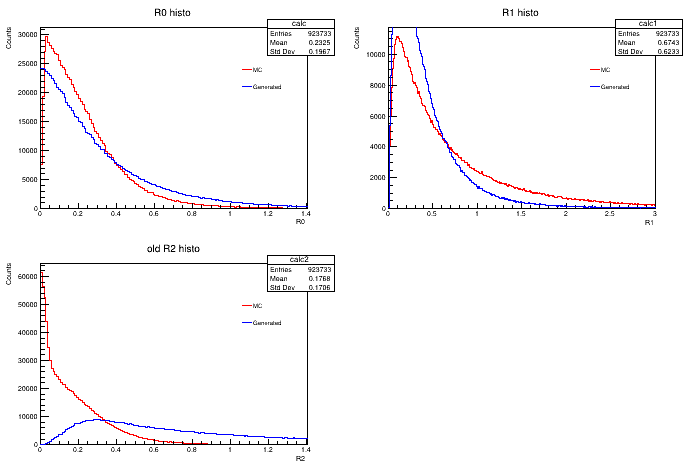

In [35]:
# Define histograms with common bin width
d = driver.Histo1D(("d", "R0 histo ;R0 ;Counts", nBins_driver_R0, 0, driver_R0_hist_max), "R0.R0_t")
d1 = driver.Histo1D(("d1","R1 histo ;R1 ;Counts",nBins_driver_R1,0,driver_R1_hist_max),"R1.R1_t")
d2 = driver.Histo1D(("d2","old R2 histo ;R2 ;Counts",nBins_driver_R2,0,driver_R2_hist_max),"R2.R2_t")


calc = MC.Histo1D(("calc", "R0 histo ;R0 ;Counts", nBins_MC, 0, MC_R0_hist_max), "R0")
calc1 = MC.Histo1D(("calc1","R1 histo ;R1 ;Counts",nBins_MC_R1,0,MC_R1_hist_max),"R1")
calc2 = MC.Histo1D(("calc2","old R2 histo;R2 ;Counts",nBins_MC,0,MC_R2_hist_max),"R2")

calc_dum = TH1F("","",1,0,1);
calc_dum.SetLineColor(2);
d_dum = TH1F("","",1,0,1);
d_dum.SetLineColor(4);
calc.SetLineColor(2)
d.SetLineColor(4)
calc1.SetLineColor(2)
d1.SetLineColor(4)
calc2.SetLineColor(2)
d2.SetLineColor(4)

legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
legend.AddEntry(calc_dum, "MC" ,"l")
legend.AddEntry(d_dum, "Generated","l" )
legend.SetLineWidth(0)

calc.GetXaxis().SetRangeUser(0,1.4)
calc1.GetXaxis().SetRangeUser(0,3)
calc2.GetXaxis().SetRangeUser(0,1.4)
d1.GetXaxis().SetRangeUser(0,3)

c = TCanvas("c","c")
c.Divide(2,2)
c.cd(1)
calc.Draw("histo")
d.Draw("same")
legend.Draw("same")
c.cd(2)

calc1.Draw("histo")
d1.Draw("same")

legend.Draw("same")
c.cd(3)
calc2.Draw("histo")
d2.Draw("same")
legend.Draw("same")
c.Draw()
c.Print("./Histos/Ratios-oldR2.pdf")

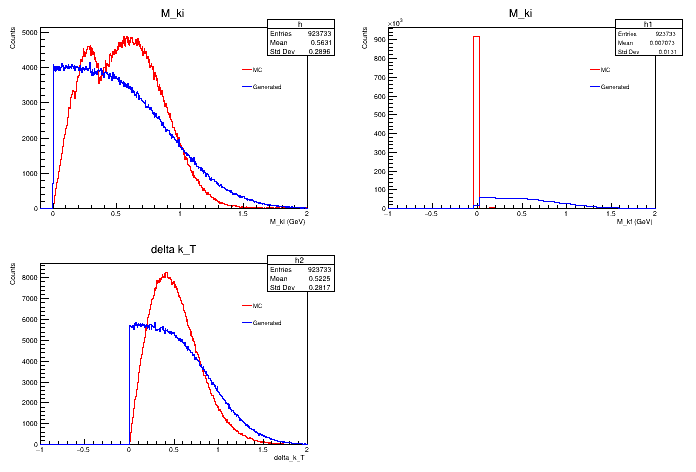

In [36]:
d = RDataFrame("tree_test", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_2/file_0.root")
#Histogams for plotting R1 values
h = d.Histo1D(("h","M_ki ;M_ki (GeV) ;Counts",500,-0.1,2),"M_ki")
h1 = d.Histo1D(("h1","M_ki ;M_kf (GeV) ;Counts",50,-1,2),"M_kf")
h2 = d.Histo1D(("h2","delta k_T;delta_k_T ;Counts",500,-1,2),"delta_k_T")
r = d.Histo1D(("r",";r_M_ki (GeV) ;Counts",500,-0.1,2),"r_M_ki")
r1 = d.Histo1D(("r1",";r_M_kf (GeV) ;Counts",50,-1,2),"r_M_kf")
r2 = d.Histo1D(("r2",";r_delta_k_T ;Counts",500,-1,2),"r_delta_k_T")
# h3 = d.Histo1D(("h3",";ki_y ;Counts",1000,-5,5),"ki_y")
# h4 = d.Histo1D(("h4",";ki_z ;Counts",1000,-5,5),"ki_z")
# h5 = d.Histo1D(("h5",";kf_x ;Counts",1000,-5,5),"kf_x")
# h6 = d.Histo1D(("h6",";kf_y ;Counts",1000,-5,5),"kf_y")
# h7 = d.Histo1D(("h7",";kf_z ;Counts",1000,-5,5),"kf_z")

h_dum = TH1F("","",1,0,1);
h_dum.SetLineColor(2);
r_dum = TH1F("","",1,0,1);
r_dum.SetLineColor(4);

h.SetLineColor(2)
r.SetLineColor(4)
h1.SetLineColor(2)
r1.SetLineColor(4)
h2.SetLineColor(2)
r2.SetLineColor(4)

legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
legend.AddEntry(h_dum, "MC" ,"l")
legend.AddEntry(r_dum, "Generated","l" )
legend.SetLineWidth(0)
c = TCanvas("c","c")
c.Divide(2,2)
c.cd(1)
h.Draw("histo")
r.Draw("same")
legend.Draw("same")
c.cd(2)
h1.Draw("histo")
r1.Draw("same")
legend.Draw("same")
c.cd(3)
h2.Draw("histo")
r2.Draw("same")
legend.Draw("same")
# c.cd(4)
# h5.Draw("histo")
# c.cd(5)
# h3.Draw("histo")
# c.cd(6)
# h6.Draw("histo")
# c.cd(7)
# h4.Draw("histo")
# c.cd(8)
# h7.Draw("histo")
c.Draw()
c.Print("./Histos/partons_July_2.pdf")

In [ ]:
'''
h1 = d.Histo1D(("h1",";R1breit ;Counts", 1000, -5, 5), "R1breit")
h2 = d.Histo1D(("h2",";R1lab ;Counts", 1000, -5, 5), "R1lab")
h3 = d.Histo1D(("h3",";R1num gN ;Counts", 1000, -5, 5), "R1num")
h6 = d.Histo1D(("h4",";R1denom gN ;Counts", 1000, -5, 5), "R1denom")
h5 = d.Histo1D(("h5",";R1num lab ;Counts", 1000, -5, 5), "R1num_lab")
# h6 = d.Histo1D(("h6",";Mx ;Counts", 1000, 0, 3), "Mx")
h8 = d.Histo1D(("h6",";R1denom lab ;Counts", 1000, -5, 5), "R1denom_lab")
h4 = d.Histo1D(("h7",";R1num Breit;Counts", 1000, -5, 5), "R1num_Breit")
h7 = d.Histo1D(("h8",";R1denom Breit;Counts", 1000, -5, 5),"R1denom_Breit")
'''

In [13]:
e_i_energy = 10.6
p_i_energy = 0.9383
q_energy = 7.3918
e_f_energy = 3.2082
k_f_energy = 6.1048
diquark_energy = 1.1031
initial = e_i_energy + p_i_energy
final = e_f_energy + k_f_energy + diquark_energy + 1.8168
print(final - initial)

0.6946000000000012


## Particular bins

### Bin 0: high TMD aff
### Bin 1: low TMD aff

In [3]:
histo_name = ["high TMD aff bin", "low TMD aff bin"]

x_bins = [0.1, 0.06]
Q2_bins = [3.5, 1.77]
z_bins = [0.725, 0.75]
pT_bins = [0.0225, 1.01]
expected_TMD_aff = [0.5525, 0.005]

x_tol = 0.1
z_tol = 0.1
pT_tol = 0.1
Q2_tol = 1
driver_format = "x.x_t <= {} && x.x_t > {} && z.z_t <= {} && z.z_t > {} && pT.pT_t <= {} && pT.pT_t > {} && Q2.Q2_t <= {} && Q2.Q2_t > {}"
MC_format = "x <= {} && x > {} && z <= {} && z > {} && pT <= {} && pT > {} && Q2 <= {} && Q2 > {}"

In [4]:
nBins_driver_R0_binned = int(np.floor(nBins_driver_R0 / 10)) 
nBins_driver_R1_binned = int(np.floor(nBins_driver_R1 / 10)) 
nBins_driver_R2_binned = int(np.floor(nBins_driver_R2 / 10)) 

nBins_MC_binned = int(np.floor(nBins_MC / 10)) 
nBins_MC_R1_binned = int(np.floor(nBins_MC_R1 / 10)) 

NameError: name 'nBins_driver_R0' is not defined

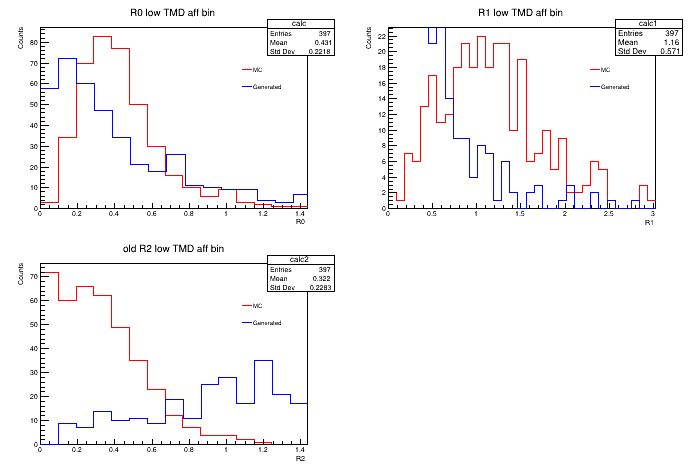

In [47]:
driver_frames = []
MC_frames = []
for i in range(2):
    driver_binned = driver.Filter(driver_format.format((x_bins[i] + x_tol),(x_bins[i] - x_tol),(z_bins[i] + z_tol),(z_bins[i] - z_tol),(pT_bins[i] + pT_tol),(pT_bins[i] - pT_tol),(Q2_bins[i] + Q2_tol),(Q2_bins[i] - Q2_tol)))
    MC_binned = MC.Filter(MC_format.format((x_bins[i] + x_tol),(x_bins[i] - x_tol),(z_bins[i] + z_tol),(z_bins[i] - z_tol),(pT_bins[i] + pT_tol),(pT_bins[i] - pT_tol),(Q2_bins[i] + Q2_tol),(Q2_bins[i] - Q2_tol)))

    # Define histograms with common bin width
    d = driver_binned.Histo1D(("d", f"R0 {histo_name[i]} ;R0 ;Counts", nBins_driver_R0_binned, 0, driver_R0_hist_max), "R0.R0_t")
    d1 = driver_binned.Histo1D(("d1",f"R1 {histo_name[i]} ;R1 ;Counts",nBins_driver_R1_binned,0,driver_R1_hist_max),"R1.R1_t")
    d2 = driver_binned.Histo1D(("d2",f"old R2 {histo_name[i]} ;R2 ;Counts",nBins_driver_R2_binned,0,driver_R2_hist_max),"R2.R2_t")


    calc = MC_binned.Histo1D(("calc", f"R0 {histo_name[i]} ;R0 ;Counts", nBins_MC_binned, 0, MC_R0_hist_max), "R0")
    calc1 = MC_binned.Histo1D(("calc1",f"R1 {histo_name[i]} ;R1 ;Counts",nBins_MC_R1_binned,0,MC_R1_hist_max),"R1")
    calc2 = MC_binned.Histo1D(("calc2",f"old R2 {histo_name[i]};R2 ;Counts",nBins_MC_binned,0,MC_R2_hist_max),"R2")

    calc_dum = TH1F("","",1,0,1);
    calc_dum.SetLineColor(2);
    d_dum = TH1F("","",1,0,1);
    d_dum.SetLineColor(4);
    calc.SetLineColor(2)
    d.SetLineColor(4)
    calc1.SetLineColor(2)
    d1.SetLineColor(4)
    calc2.SetLineColor(2)
    d2.SetLineColor(4)

    legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
    legend.AddEntry(calc_dum, "MC" ,"l")
    legend.AddEntry(d_dum, "Generated","l" )
    legend.SetLineWidth(0)

    calc.GetXaxis().SetRangeUser(0,1.4)
    calc1.GetXaxis().SetRangeUser(0,3)
    calc2.GetXaxis().SetRangeUser(0,1.4)
    d1.GetXaxis().SetRangeUser(0,3)

    c = TCanvas("c","c")
    c.Divide(2,2)
    c.cd(1)
    calc.Draw("histo")
    d.Draw("same")
    legend.Draw("same")
    c.cd(2)

    calc1.Draw("histo")
    d1.Draw("same")

    legend.Draw("same")
    c.cd(3)
    calc2.Draw("histo")
    d2.Draw("same")
    legend.Draw("same")
    c.Draw()
    c.Print(f"./Histos/Ratios/oldR2_bin{i}.pdf")

total events: 923733

In [55]:
MC = RDataFrame("tree_MC", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_07/Testing_less_data/*.root")

In [56]:
MC.GetColumnNames()

<cppyy.gbl.std.vector<string> object at 0x5576842a1210>

Error in <TList::Clear>: A list is accessing an object (0x55768a749130) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55768b5bbde0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x557686a7b330) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x5576842aff40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x557689f04480) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x5576841ee1c0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x557688b2ef00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x5576864b7f00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55768659de90) already deleted (list name = TList)
Error in <TList::Clear>: A l